<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/decompose_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

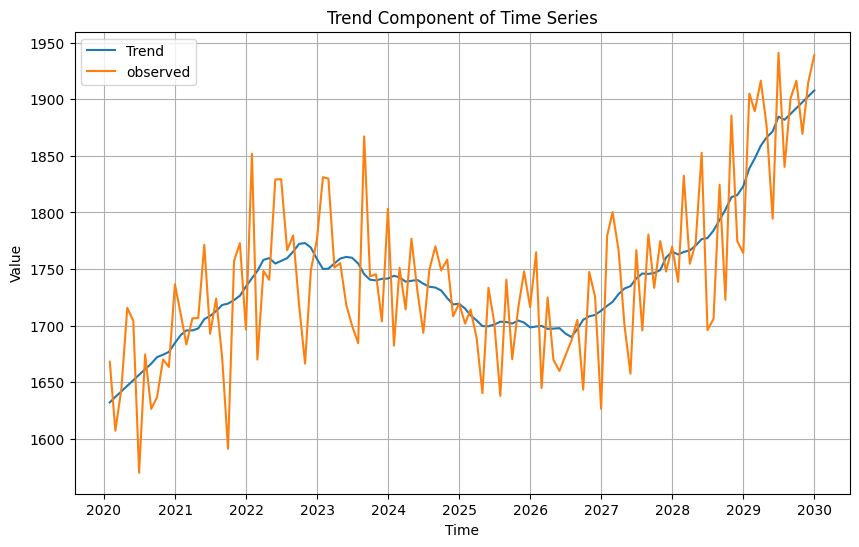

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
result = seasonal_decompose(series, model='add',two_sided=True,extrapolate_trend=1)

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(result.trend, label='Trend')
# plt.plot(result.seasonal,label='Seasonal')
# plt.plot(result.resid,label='Resid')
plt.plot(result.observed,label='observed')

plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()

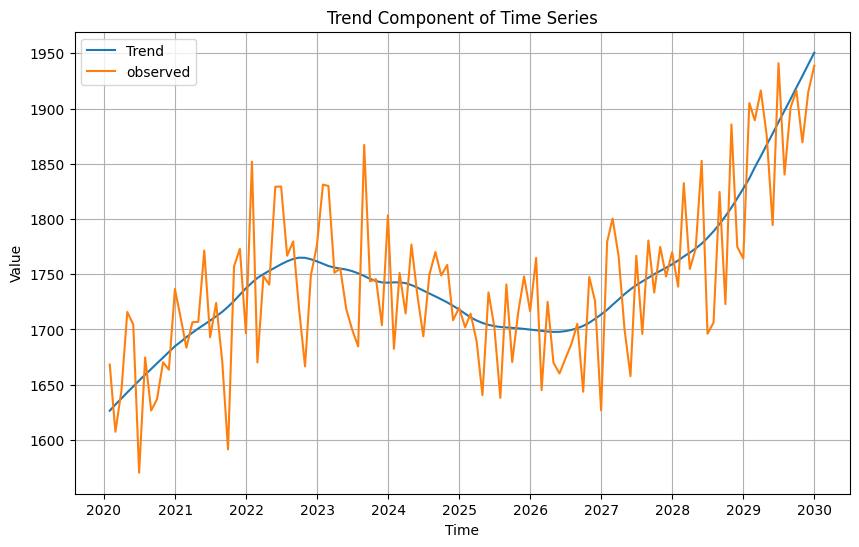

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
result_1 = STL(series,period=12).fit()

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(result_1.trend, label='Trend')
# plt.plot(result_1.seasonal,label='Seasonal')
# plt.plot(result_1.resid,label='Resid')
plt.plot(result_1.observed,label='observed')

plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()
plt.close()

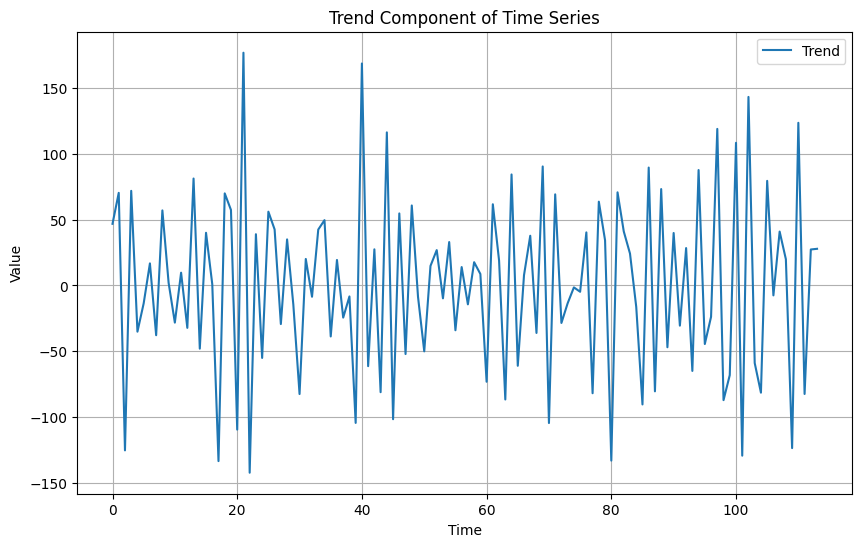

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
cycles = sm.tsa.filters.bkfilter(series.values, 1.5, 8, 3)

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(cycles, label='Trend')
# plt.plot(result_1.seasonal,label='Seasonal')
# plt.plot(result_1.resid,label='Resid')
# plt.plot(result_1.observed,label='observed')

plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()
plt.close()

In [4]:
cycles

array([  46.80829235,   70.30601109, -125.11352453,   71.82885764,
        -35.03492717,  -13.55150097,   16.77713845,  -37.73550466,
         56.98503339,    1.97273976,  -28.16648117,    9.7181261 ,
        -32.14769072,   81.17250424,  -47.92978075,   40.00661586,
          0.9935231 , -133.26513806,   69.91428102,   57.32019108,
       -109.35747209,  176.64371743, -142.08018259,   38.91806271,
        -54.96863716,   56.02069677,   42.56267511,  -29.25939942,
         34.98300821,  -14.40608924,  -82.37248401,   20.13368031,
         -8.53542469,   42.45381882,   49.59932316,  -38.6724007 ,
         19.37364943,  -24.37801188,   -8.31767895, -104.28320715,
        168.4795843 ,  -61.21142877,   27.44868134,  -80.9678784 ,
        116.19875228, -101.48383875,   54.69152696,  -52.01111942,
         60.72699889,   -8.61113922,  -49.98084002,   14.8558216 ,
         26.85901449,   -9.74488277,   32.96901087,  -33.96369592,
         13.98114974,  -14.29179191,   17.67657841,    8.72834

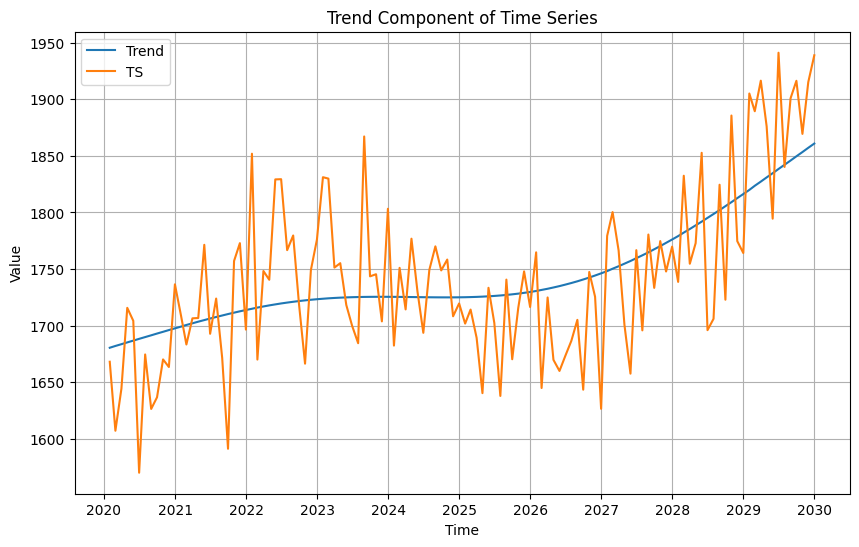

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(series,lamb=129600)

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(gdp_trend, label='Trend')
# plt.plot(gdp_cycle, label='cycle')
plt.plot(series,label='TS')
plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()
plt.close()

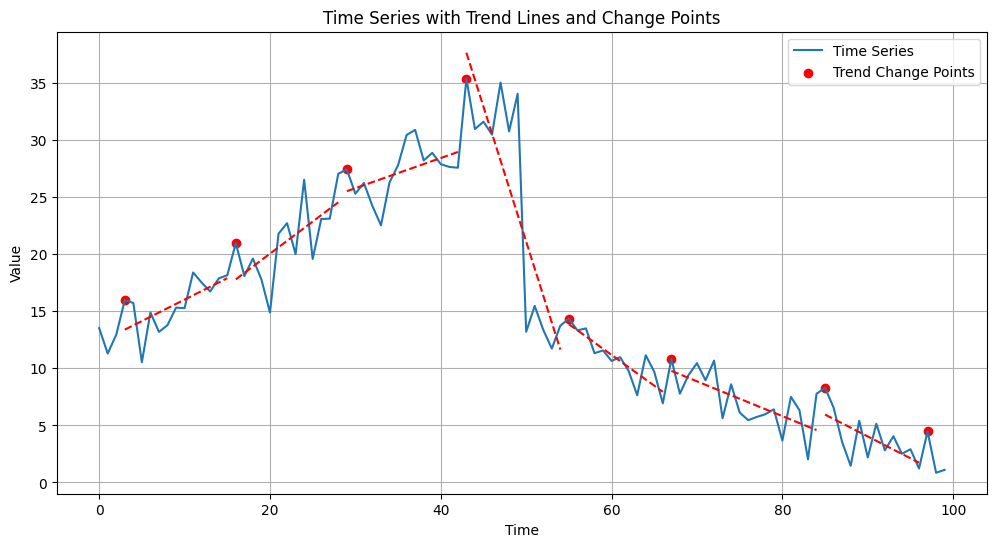

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Создание примера временного ряда с различными трендами
np.random.seed(0)
time = np.arange(0, 100, 1)
trend1 = 0.5 * time + 10  # линейный тренд
trend2 = -0.3 * time + 30  # обратный линейный тренд
data = np.concatenate((trend1[:50], trend2[50:])) + np.random.normal(0, 2, 100)

# Разбиение временного ряда на участки с помощью поиска пиков
peaks, _ = find_peaks(data, distance=10)  # найдем пики, которые будут указывать на изменения тренда

# Построение прямых линий на участках и точек пересечения
plt.figure(figsize=(12, 6))
plt.plot(data, label='Time Series')

for i in range(len(peaks)-1):
    start = peaks[i]
    end = peaks[i+1]
    x_values = np.arange(start, end)
    slope, intercept = np.polyfit(x_values, data[start:end], 1)
    plt.plot(x_values, slope*x_values + intercept, linestyle='--', color='red')

plt.scatter(peaks, data[peaks], color='red', marker='o', label='Trend Change Points')
plt.legend()
plt.title('Time Series with Trend Lines and Change Points')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

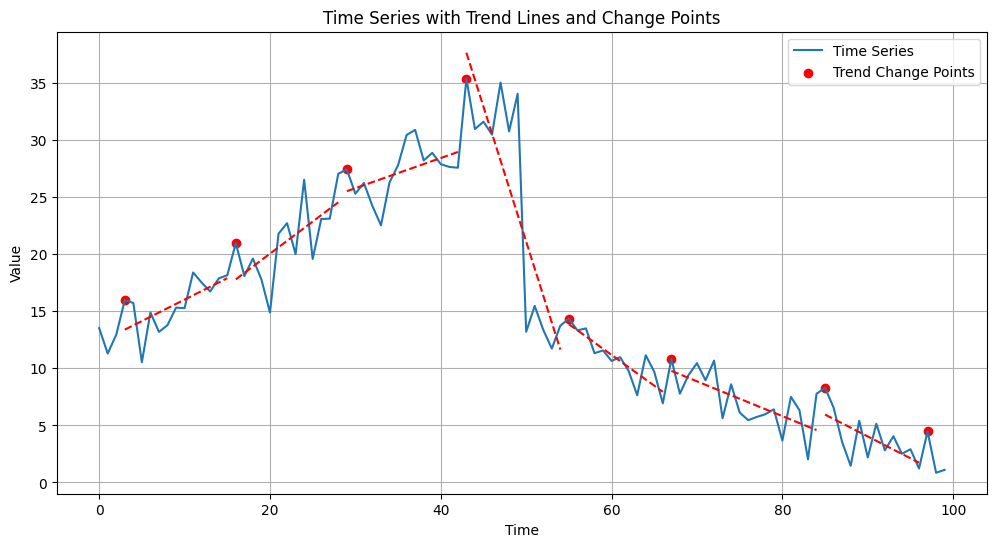

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Создание примера временного ряда с различными трендами
np.random.seed(0)
time = np.arange(0, 100, 1)
trend1 = 0.5 * time + 10  # линейный тренд
trend2 = -0.3 * time + 30  # обратный линейный тренд
data = np.concatenate((trend1[:50], trend2[50:])) + np.random.normal(0, 2, 100)

# Разбиение временного ряда на участки с помощью поиска пиков
peaks, _ = find_peaks(data, distance=10)  # найдем пики, которые будут указывать на изменения тренда

# Построение прямых линий на участках и точек пересечения
plt.figure(figsize=(12, 6))
plt.plot(data, label='Time Series')

for i in range(len(peaks)-1):
    start = peaks[i]
    end = peaks[i+1]
    x_values = np.arange(start, end)
    slope, intercept = np.polyfit(x_values, data[start:end], 1)
    plt.plot(x_values, slope*x_values + intercept, linestyle='--', color='red')

plt.scatter(peaks, data[peaks], color='red', marker='o', label='Trend Change Points')
plt.legend()
plt.title('Time Series with Trend Lines and Change Points')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [8]:
peaks

array([ 3, 16, 29, 43, 55, 67, 85, 97])

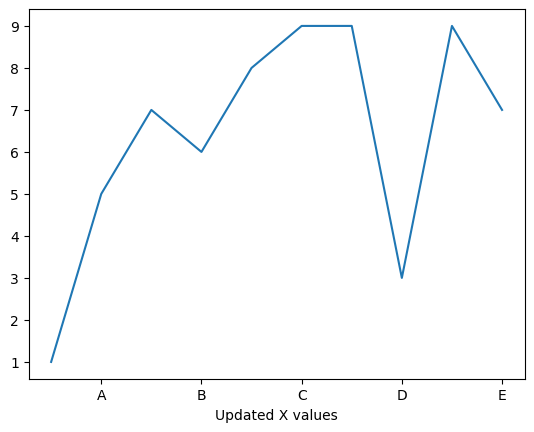

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Создание примера данных
x = np.arange(0, 10, 1)
y = np.random.randint(1, 10, size=10)

# Построение графика
plt.plot(x, y)
plt.xlabel('Original X values')

# Новые значения для оси X
new_x_values = np.array([1, 3, 5, 7, 9])  # Новые значения оси X
new_labels = ['A', 'B', 'C', 'D', 'E']  # Новые подписи для значений

# Изменение значений оси X
plt.xticks(new_x_values, new_labels)
plt.xlabel('Updated X values')

plt.show()

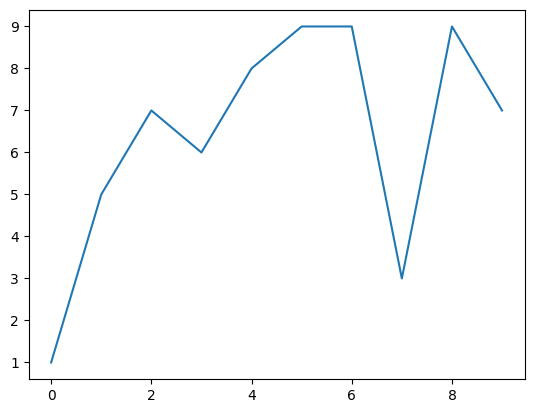

In [10]:
plt.plot(x, y)
plt.show()

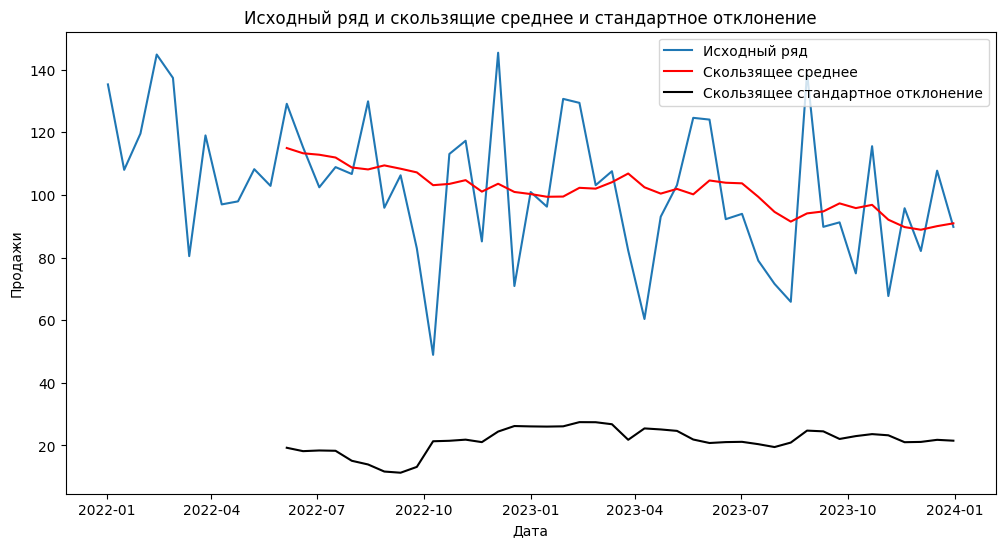

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем временной ряд (пример)
# Замените этот код своими реальными данными
# Предположим, что у вас есть DataFrame 'df' с колонкой 'sales' и индексом типа DateTime
# df = pd.read_csv('ваш_файл.csv', parse_dates=['timestamp'], index_col='timestamp')

# Пример создания случайного временного ряда
import numpy as np
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='2W')
sales = np.random.normal(loc=100, scale=20, size=len(date_range))
df = pd.DataFrame({'sales': sales}, index=date_range)

# Вычисляем скользящее среднее и стандартное отклонение
window_size = 12  # Размер окна для скользящего среднего и стандартного отклонения
rolling_mean = df['sales'].rolling(window=window_size).mean()
rolling_std = df['sales'].rolling(window=window_size).std()

# Визуализируем исходный ряд и скользящие среднее и стандартное отклонение
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Исходный ряд')
plt.plot(rolling_mean.index, rolling_mean, color='red', label='Скользящее среднее')
plt.plot(rolling_std.index, rolling_std, color='black', label='Скользящее стандартное отклонение')
plt.legend()
plt.title('Исходный ряд и скользящие среднее и стандартное отклонение')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


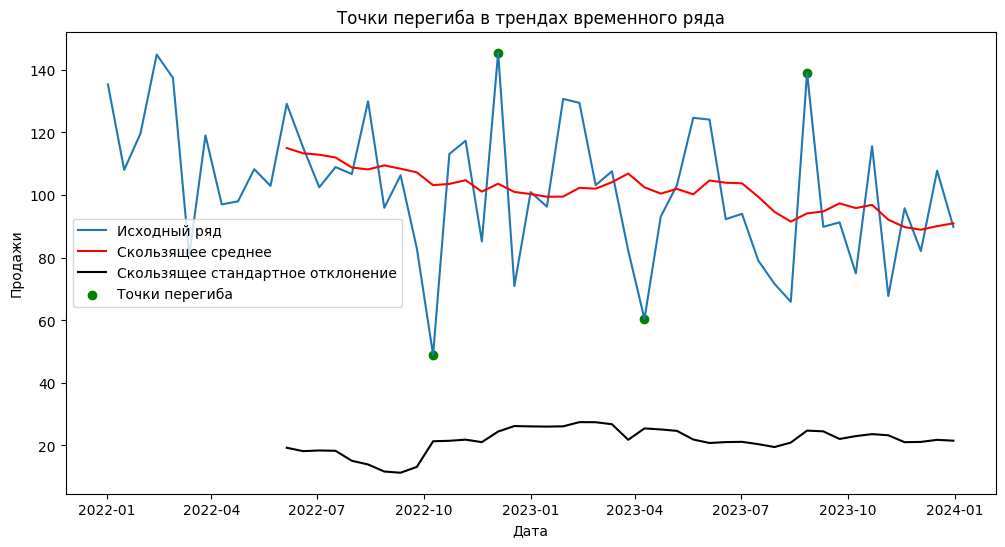

In [12]:
# Вычисляем производную скользящего стандартного отклонения
rolling_std_diff = rolling_std.diff()

# Установим порог для определения точек перегиба
threshold = 2.0  # Произвольный порог, который вы можете настроить

# Найдем индексы, где производная превышает порог
change_points = rolling_std_diff[rolling_std_diff > threshold].index

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Исходный ряд')
plt.plot(rolling_mean.index, rolling_mean, color='red', label='Скользящее среднее')
plt.plot(rolling_std.index, rolling_std, color='black', label='Скользящее стандартное отклонение')
plt.scatter(change_points, df.loc[change_points]['sales'], color='green', label='Точки перегиба')
plt.legend()
plt.title('Точки перегиба в трендах временного ряда')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()




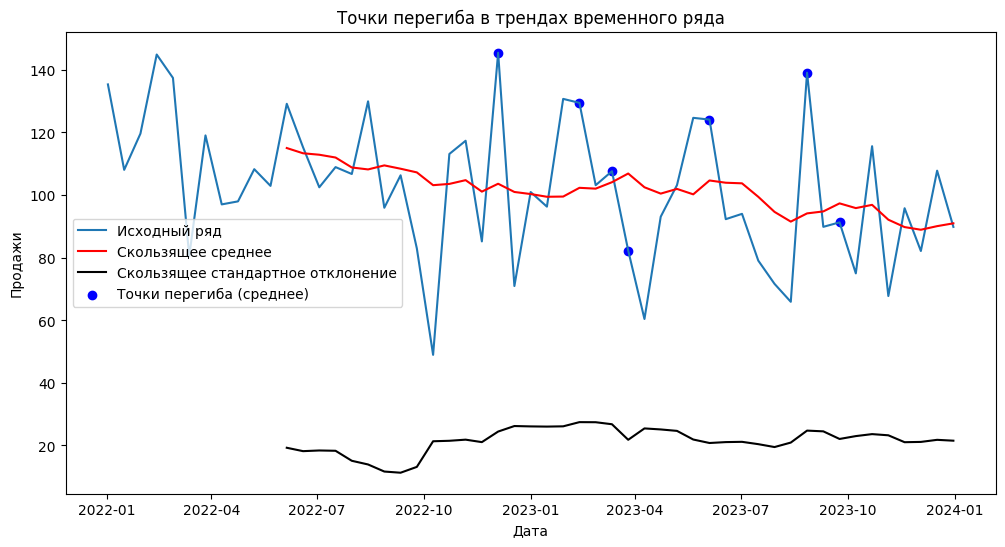

In [13]:
# Вычисляем производную скользящего среднего
rolling_mean_diff = rolling_mean.diff()

# Установим порог для определения точек перегиба
threshold = 2.0  # Произвольный порог, который вы можете настроить

# Найдем индексы, где производная превышает порог
change_points_mean = rolling_mean_diff[rolling_mean_diff > threshold].index

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Исходный ряд')
plt.plot(rolling_mean.index, rolling_mean, color='red', label='Скользящее среднее')
plt.plot(rolling_std.index, rolling_std, color='black', label='Скользящее стандартное отклонение')
plt.scatter(change_points_mean, df.loc[change_points_mean]['sales'], color='blue', label='Точки перегиба (среднее)')
plt.legend()
plt.title('Точки перегиба в трендах временного ряда')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


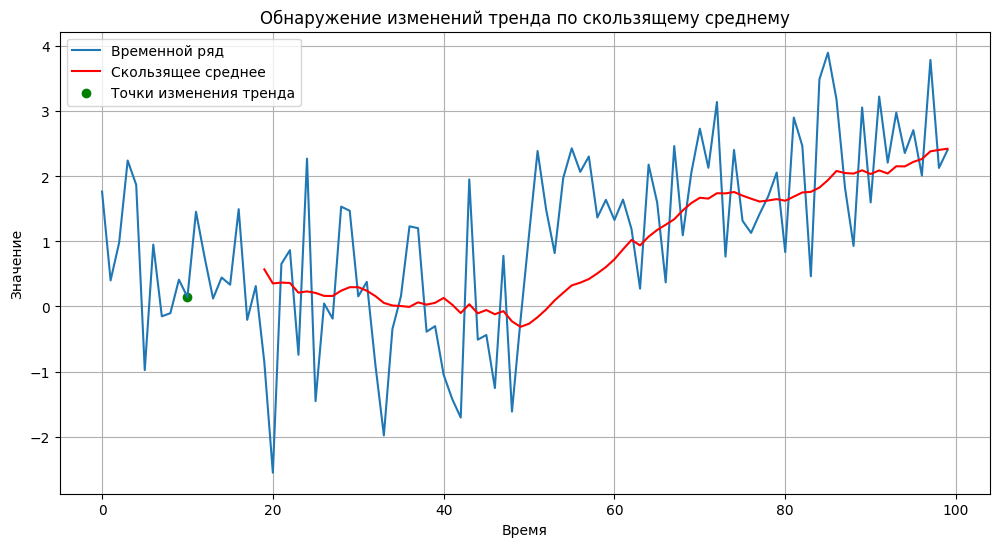

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Пример временного ряда (вы можете заменить его своим реальным временным рядом)
np.random.seed(0)
time = np.arange(100)
values = np.random.normal(loc=0, scale=1, size=100)
values[50:] += 2  # Имитация изменения тренда в середине временного ряда

# Скользящее среднее
window_size = 20
rolling_mean = np.convolve(values, np.ones(window_size)/window_size, mode='valid')

# Найдем изменения в тренде по скользящему среднему
threshold = 0.2
change_points = np.where(np.abs(np.diff(rolling_mean)) > threshold)[0] + (window_size // 2)

# Визуализация временного ряда и точек изменений тренда
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Временной ряд')
plt.plot(time[window_size-1:], rolling_mean, color='red', label='Скользящее среднее')
plt.scatter(time[change_points], values[change_points], color='green', label='Точки изменения тренда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда по скользящему среднему')
plt.grid(True)
plt.show()



In [15]:
change_points

array([10])

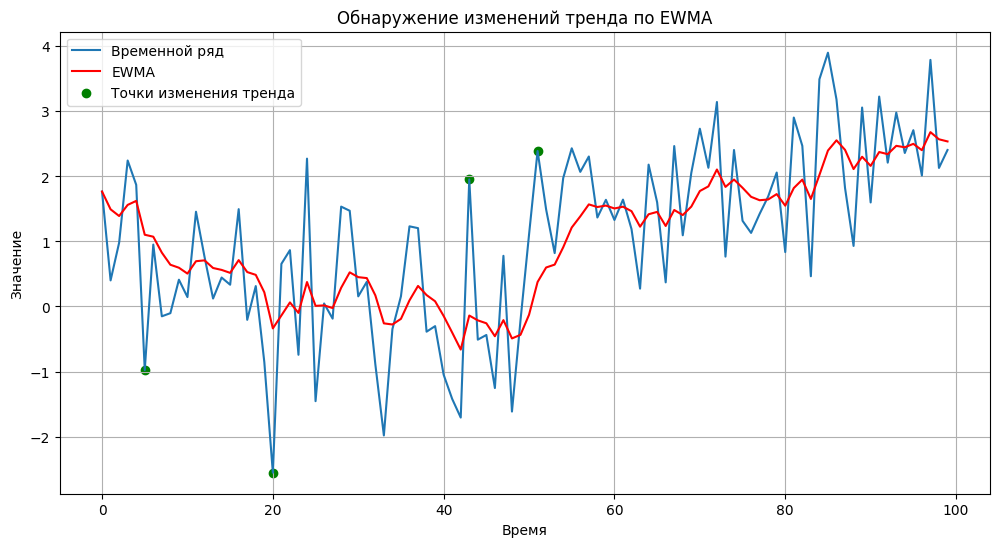

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Пример временного ряда (вы можете заменить его своим реальным временным рядом)
np.random.seed(0)
time = np.arange(100)
values = np.random.normal(loc=0, scale=1, size=100)
values[50:] += 2  # Имитация изменения тренда в середине временного ряда

# Функция для вычисления экспоненциально взвешенного скользящего среднего (EWMA)
def ewma(data, alpha):
    weighted_avg = [data[0]]  # Инициализируем первое значение средним
    for i in range(1, len(data)):
        weighted_avg.append(alpha * data[i] + (1 - alpha) * weighted_avg[-1])
    return np.array(weighted_avg)

# Параметры метода EWMA
alpha = 0.2  # Коэффициент сглаживания

# Вычисляем экспоненциально взвешенное скользящее среднее
ewma_values = ewma(values, alpha)

# Определяем изменения в тренде по EWMA
threshold = 0.5  # Порог для определения изменений в тренде
change_points = np.where(np.abs(np.diff(ewma_values)) > threshold)[0] + 1

# Визуализация временного ряда и точек изменений тренда
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Временной ряд')
plt.plot(time, ewma_values, color='red', label='EWMA')
plt.scatter(time[change_points], values[change_points], color='green', label='Точки изменения тренда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда по EWMA')
plt.grid(True)
plt.show()



In [17]:
!pip install ruptures

50
100


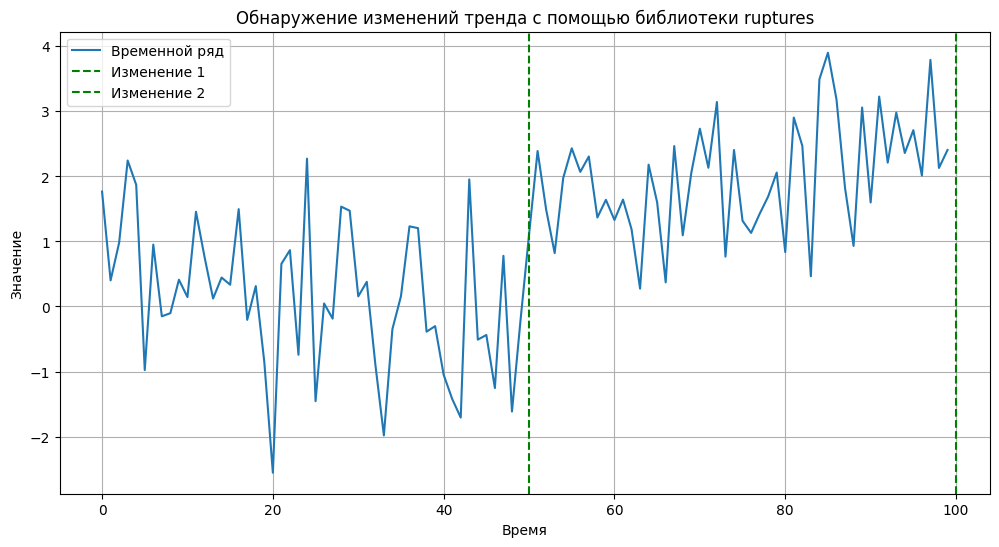

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Пример временного ряда (вы можете заменить его своим реальным временным рядом)
np.random.seed(0)
time = np.arange(100)
values = np.random.normal(loc=0, scale=1, size=100)
values[50:] += 2  # Имитация изменения тренда в середине временного ряда

# Построение модели разладки
model = rpt.Pelt(model="rbf").fit(values)
# Применение модели к данным
result = model.predict(pen=10)

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Временной ряд')
for idx, r in enumerate(result):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.show()


In [19]:
result

[50, 100]

In [20]:
import pandas as pd

path_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/series_data.csv'


# Читаем данные из CSV файла в DataFrame
df = pd.read_csv(path_csv_red)

# Преобразуем один из столбцов DataFrame в pd.Series
series_data = df['SALES VOL']  # Замените 'column_name' на имя столбца, содержащего данные
date_idx = pd.date_range(start='2022-01-01', end='2024-01-01',freq='2W-SUN')
series_data.index = date_idx[:-1]
# plt.plot(series_data)
# plt.grid()
# plt.show()

20
52


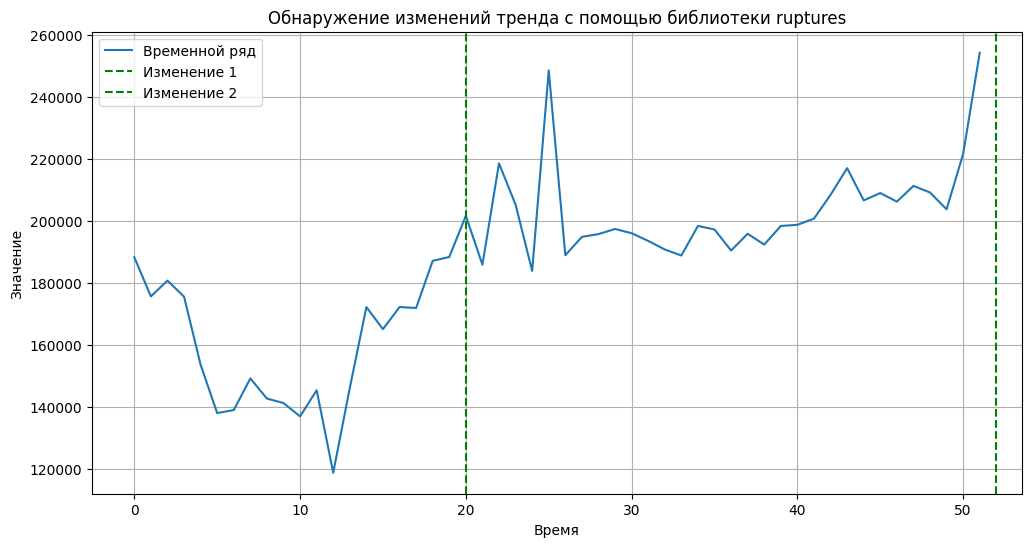

In [93]:
# Построение модели разладки
model = rpt.Pelt(model="rbf").fit(series_data.values)
# Применение модели к данным
result = model.predict(pen=5)

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(series_data.values, label='Временной ряд')
for idx, r in enumerate(result):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.show()


20
52


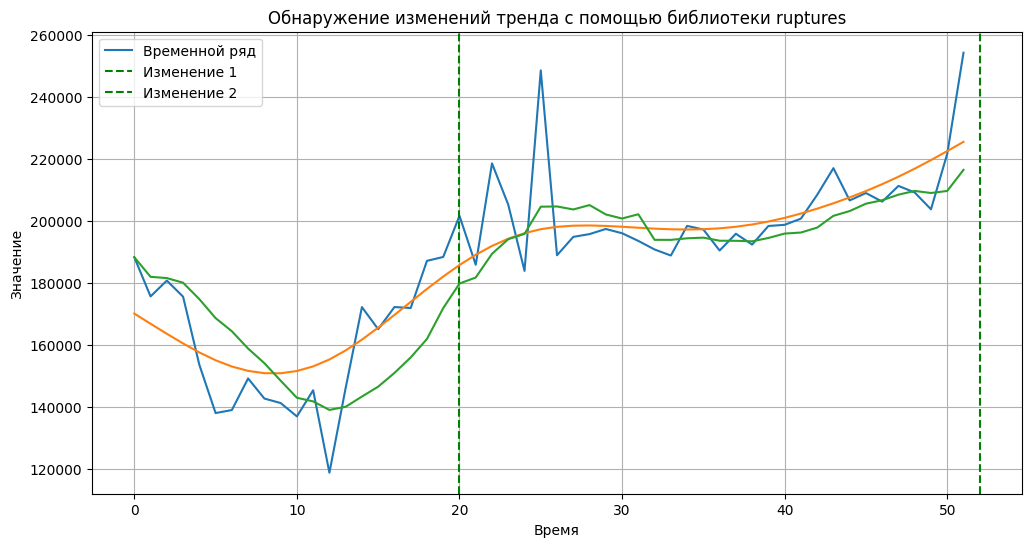

In [72]:
import statsmodels.api as sm

# Декомпозиция временного ряда
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(series_data,lamb=400)


# Построение модели разладки
model = rpt.Pelt(model="rbf").fit(series_data.values)
model_2 = rpt.Pelt(model="rbf").fit(gdp_trend.values)

# Вычисление скользящего среднего
window_size = 7 # Размер окна для скользящего среднего
rolling_mean = series_data.rolling(window=window_size, min_periods=1).mean()
# Применение модели к данным
result = model.predict(pen=5)
result_2 = model_2.predict(pen=5)

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(series_data.values, label='Временной ряд')
# for idx, r in enumerate(result):
#     print(r)
#     plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
for idx, r in enumerate(result_2):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.plot(gdp_trend.values)
plt.plot(rolling_mean.values)
plt.show()

52


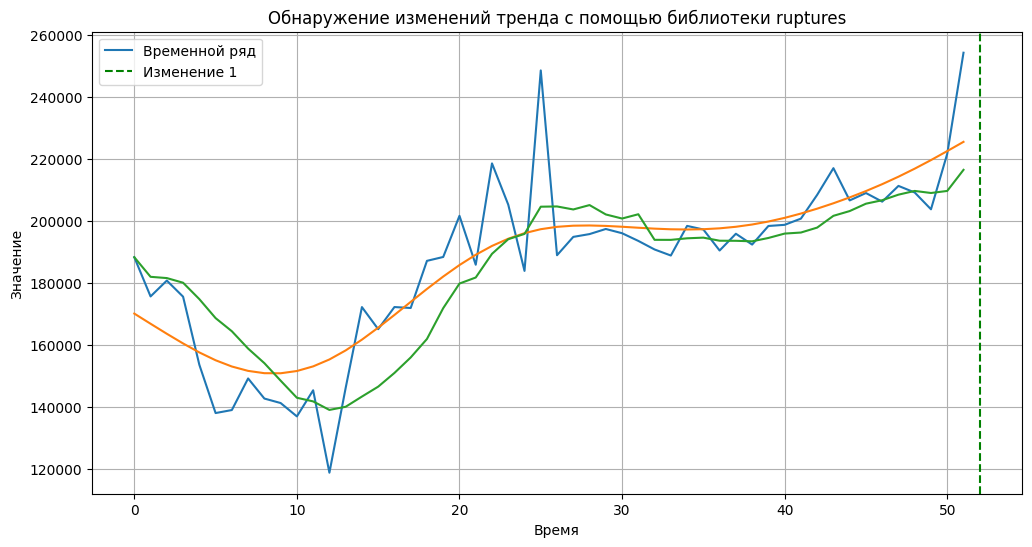

In [92]:
import statsmodels.api as sm

# Декомпозиция временного ряда
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(series_data,lamb=400)



algo = rpt.Window(model="rbf").fit_predict(gdp_trend.values,pen=5)

model_2 = rpt.Pelt(model="rbf").fit(gdp_trend.values)

# Вычисление скользящего среднего
window_size = 7 # Размер окна для скользящего среднего
rolling_mean = series_data.rolling(window=window_size, min_periods=1).mean()
# Применение модели к данным


result = algo

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(series_data.values, label='Временной ряд')

for idx, r in enumerate(result):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.plot(gdp_trend.values)
plt.plot(rolling_mean.values)
plt.show()

In [88]:
algo